In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.layers import (Input, Dense, 
                          Conv2D, AveragePooling2D, GlobalAveragePooling2D)
from keras.optimizers import Adam
import shutil
from tensorflow.keras import Model
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
import random
#####################################
import sys
sys.path.insert(0, 'HelperFiles')
from HelperFunctions import *
#####################################

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2023-05-07 08:39:22.327468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/chrispv/miniconda3/envs/tf-LSTM/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
2023-05-07 08:39:24.772499: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 08:39:24.797089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus

In [2]:
datasetPath = "../../datasets"

In [3]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = genres.split()

# Split Into Training and Testing
directory = f"{datasetPath}/spectrograms3sec/train/"
for g in genres:
  if len(os.listdir(os.path.join(f'{datasetPath}/spectrograms3sec/test/',f"{g}"))) == 0:
    filenames = os.listdir(os.path.join(directory,f"{g}"))
    random.shuffle(filenames)
    test_files = filenames[0:100]

    for f in test_files:

      shutil.move(directory + f"{g}"+ "/" + f,f"{datasetPath}/spectrograms3sec/test/" + f"{g}")

# Split Into Training and Validation
directory = f"{datasetPath}/spectrograms3sec/train/"
for g in genres:
  if len(os.listdir(os.path.join(f'{datasetPath}/spectrograms3sec/valid/',f"{g}"))) == 0:
    filenames = os.listdir(os.path.join(directory,f"{g}"))
    random.shuffle(filenames)
    test_files = filenames[0:100]

    for f in test_files:

      shutil.move(directory + f"{g}"+ "/" + f,f"{datasetPath}/spectrograms3sec/valid/" + f"{g}")

In [4]:
train_dir = f"{datasetPath}/spectrograms3sec/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(128,130),color_mode="rgba",class_mode='categorical',batch_size=128)

test_dir = f"{datasetPath}/spectrograms3sec/test/"
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(128,130),color_mode='rgba',class_mode='categorical',batch_size=128)

Found 8000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [5]:
validation_dir = f"{datasetPath}/spectrograms3sec/valid/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(128,130),color_mode='rgba',class_mode='categorical',batch_size=128)

def GenreModel(input_shape = (128,130, 4),classes=10):
  X_input = Input(input_shape)

  X = Conv2D(256, kernel_size=(3,3), activation='relu',padding="valid")(X_input)

  X = Conv2D(256, kernel_size=(3,3), activation='relu',padding="valid")(X)
  X = AveragePooling2D(pool_size=(3, 3), strides=(2,2),padding="same")(X)
  
  X = Conv2D(256, kernel_size=(3,3), activation='relu',padding="valid")(X)
  X = AveragePooling2D(pool_size=(3, 3), strides=(2,2),padding="same")(X)

  X = Conv2D(512, kernel_size=(4,4), activation='relu',padding="valid")(X)
  X = GlobalAveragePooling2D()(X)

  X = Dense(256, activation='relu')(X)
  X = Dense(128, activation='relu')(X)
  X = Dense(10, activation='softmax')(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model

Found 1000 images belonging to 10 classes.


In [6]:
# checkpoint_path = "saved_cnn3/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                 save_weights_only=False,
#                                                 verbose=1)

model = GenreModel(input_shape=(128,130, 4), classes=10)
opt = Adam()
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy'])

2023-05-07 08:39:25.692847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 08:39:25.694277: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 08:39:25.694613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-07 08:39:25.694811: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0c:00.0/numa_nod

In [7]:
model.summary()

Model: "GenreModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 130, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 128, 256)     9472      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 126, 256)     590080    
                                                                 
 average_pooling2d (AverageP  (None, 62, 63, 256)      0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 61, 256)       590080    
                                                                 
 average_pooling2d_1 (Averag  (None, 30, 31, 256)      0         
 ePooling2D)                                            

In [8]:
fresh_model = True

from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint("../saved/saved_cnn18_3_BEST.hdf5", save_best_only=True, monitor="val_loss", mode="min")
model_history = model.fit_generator(train_generator,epochs=60,validation_data=vali_generator, callbacks=[mc])

# if os.path.exists("../saved/saved_cnn15_3.h5"):
#     model_history = keras.models.load_model("../saved/saved_cnn15_3.h5")
# else:
#     model_history = model.fit_generator(train_generator,epochs=200,validation_data=vali_generator)
#     # model.save("../saved/saved_cnn14_3.h5")
#     fresh_model = True


/tmp/ipykernel_202088/2228238230.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(train_generator,epochs=60,validation_data=vali_generator, callbacks=[mc])


Epoch 1/60


2023-05-07 08:39:28.564604: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-05-07 08:39:53.191424: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


63/63 [==============================] - 67s 603ms/step - loss: 2.1242 - accuracy: 0.1975 - val_loss: 2.0076 - val_accuracy: 0.2620
Epoch 2/60
63/63 [==============================] - 33s 526ms/step - loss: 1.9125 - accuracy: 0.2851 - val_loss: 1.8488 - val_accuracy: 0.3340
Epoch 3/60
63/63 [==============================] - 32s 502ms/step - loss: 1.7931 - accuracy: 0.3415 - val_loss: 1.6918 - val_accuracy: 0.3620
Epoch 4/60
63/63 [==============================] - 32s 503ms/step - loss: 1.6413 - accuracy: 0.3907 - val_loss: 1.5966 - val_accuracy: 0.4070
Epoch 5/60
63/63 [==============================] - 31s 495ms/step - loss: 1.5414 - accuracy: 0.4320 - val_loss: 1.5944 - val_accuracy: 0.3760
Epoch 6/60
63/63 [==============================] - 33s 519ms/step - loss: 1.4866 - accuracy: 0.4493 - val_loss: 1.4458 - val_accuracy: 0.4540
Epoch 7/60
63/63 [==============================] - 31s 485ms/step - loss: 1.4214 - accuracy: 0.4723 - val_loss: 1.3455 - val_accuracy: 0.4940
Epoch 8/60

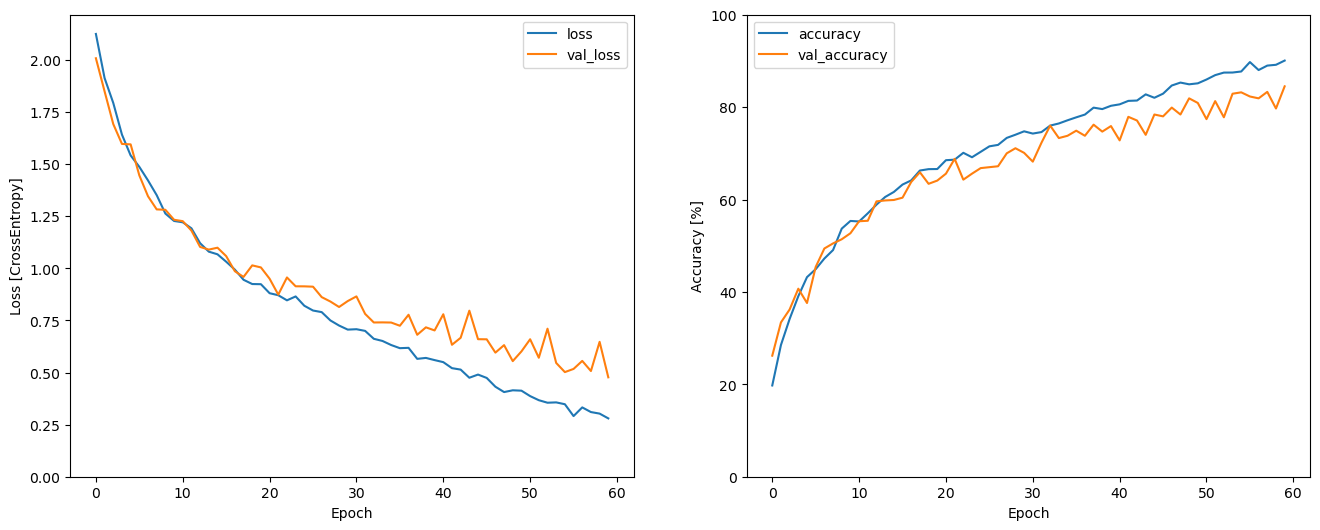

In [9]:
if fresh_model:
    metrics = model_history.history
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(model_history.epoch, metrics['loss'], metrics['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.ylim([0, max(plt.ylim())])
    plt.xlabel('Epoch')
    plt.ylabel('Loss [CrossEntropy]')

    plt.subplot(1,2,2)
    plt.plot(model_history.epoch, 100*np.array(metrics['accuracy']), 100*np.array(metrics['val_accuracy']))
    plt.legend(['accuracy', 'val_accuracy'])
    plt.ylim([0, 100])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy [%]')